In [45]:
import matplotlib.pyplot as plt
import numpy as np
import random

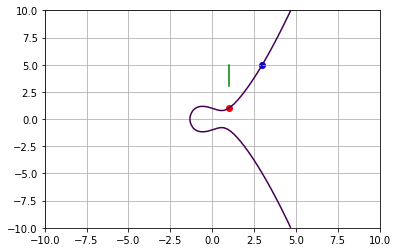

In [193]:
x1_rand, y1_rand = 0.0, 0.0
x2_rand, y2_rand = 0.0, 0.0
private_key_n = 1
for _ in range(private_key_n):
  a = -1
  b = 1
  y, x = np.ogrid[-10:10:100j, -10:10:100j]
  plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])  
  plt.grid()
  
  while(y1_rand**2 != (x1_rand**3 + a*x1_rand + b)):
    x1_rand = random.randrange(0, 10)
    y1_rand = random.randrange(0, 10)
  while(y2_rand**2 != (x2_rand**3 + a*x2_rand + b)):
    x2_rand = random.randrange(0, 10)
    y2_rand = random.randrange(0, 10)

  plt.scatter(x1_rand, y1_rand, color='red')
  plt.scatter(x2_rand, y2_rand, color='blue')
  plt.plot([x1_rand, y1_rand],[x2_rand, y2_rand], color='green')

  plt.show()
  plt.pause(0.001)
  plt.show()
